# **Assignment-3  Task-1**

# **Shubham Muley**
### **20MAI0056**


Write a program to implement the AlexNet model (Note : You can use any publically available dataset for testing).

**While implementing you have to show following things:**

1. Display sample input and output images (at least 10 images).
2. Display the total images in the database, size of the image, no of classes in the database.
3. Display the first convolution function kernel filter coefficient values
4. Display the training accuracy / training error
5. Display the testing accuracy


In [140]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization

In [141]:
import warnings
warnings.filterwarnings("ignore")

In [142]:
#np.random.seed(0)
AlexNet = Sequential()

In [143]:
#1st Convolution Layer
AlexNet.add(Conv2D(filters=96,input_shape=(32,32,3),kernel_size=(11,11),strides=(4,4),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

In [144]:
#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

In [145]:
#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

In [146]:
#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

In [147]:
#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

In [148]:
#Passing it to a Fully Connected layer
AlexNet.add(Flatten())

In [149]:
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

In [150]:
#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

In [151]:
#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

In [152]:
#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [153]:
#Model Summary
AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_27 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_27 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_28 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_28 (Activation)   (None, 4, 4, 256)        

In [154]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [155]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

## Q1 - Sample input and output images.

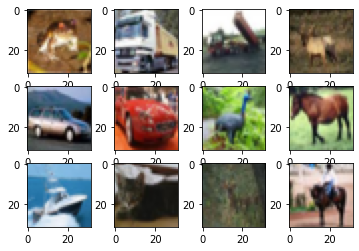

In [157]:
from matplotlib import pyplot
# plot first few input images from training datasets
for i in range(12):
    # define subplot
    pyplot.subplot(3,4,i+1)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

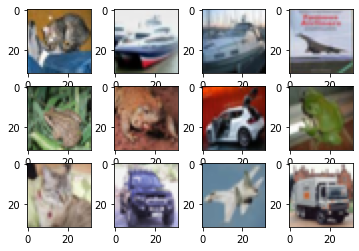

In [158]:
# plot first few input images for testing dataset
for i in range(12):
    # define subplot
    pyplot.subplot(3,4,i+1)
    # plot raw pixel data
    pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

## Q2--The total images in the database, size of the image, no of classes in the database.

In [159]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [160]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(35000, 32, 32, 3), y=(35000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(15000, 32, 32, 3), y=(15000, 1)


In [161]:
print("Total images in dataset: ",x_train.shape[0]+x_test.shape[0]+x_val.shape[0])

Total images in dataset:  60000


In [162]:
print("Size of the image: ",x_train[0].shape)

Size of the image:  (32, 32, 3)


In [163]:
classes = np.unique(y_train)
print("classes in output class is: ",classes)
print("No. of classes in output class: ",len(classes))

classes in output class is:  [0 1 2 3 4 5 6 7 8 9]
No. of classes in output class:  10


In [164]:
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

In [165]:
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [166]:
#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))

print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


## Q3 - The first convolution function kernel filter coefficient values

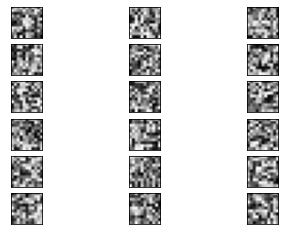

In [168]:
filters, biases = AlexNet.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

## Q4 - The training accuracy / training error

In [170]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

In [171]:
#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [172]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

In [173]:

#Defining the parameters
batch_size= 100
epochs=10
learn_rate=.001  

In [174]:

AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)


Epoch 1/10
350/350 [==============================] - 24s 64ms/step - loss: 1.8050 - accuracy: 0.3471 - val_loss: 1.7852 - val_accuracy: 0.3875
Epoch 2/10
350/350 [==============================] - 16s 46ms/step - loss: 1.4287 - accuracy: 0.4979
Epoch 3/10
350/350 [==============================] - 16s 46ms/step - loss: 1.2938 - accuracy: 0.5458
Epoch 4/10
350/350 [==============================] - 16s 46ms/step - loss: 1.2051 - accuracy: 0.5827
Epoch 5/10
350/350 [==============================] - 16s 47ms/step - loss: 1.1390 - accuracy: 0.6097
Epoch 6/10
350/350 [==============================] - 16s 46ms/step - loss: 1.0747 - accuracy: 0.6288
Epoch 7/10
350/350 [==============================] - 16s 47ms/step - loss: 1.0151 - accuracy: 0.6522
Epoch 8/10
350/350 [==============================] - 16s 46ms/step - loss: 0.9731 - accuracy: 0.6656
Epoch 9/10
350/350 [==============================] - 16s 46ms/step - loss: 0.9215 - accuracy: 0.6855
Epoch 10/10
350/350 [===================

In [175]:
import os
import time
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [176]:
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt

In [177]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    #Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)


## Q5 - The testing accuracy

In [179]:
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

In [180]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

In [181]:

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Confusion matrix, without normalization


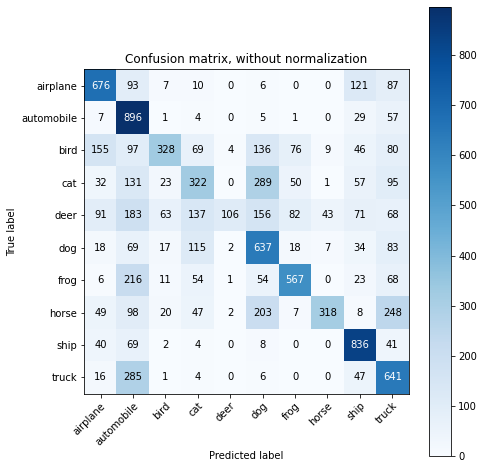

In [182]:
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

Normalized confusion matrix


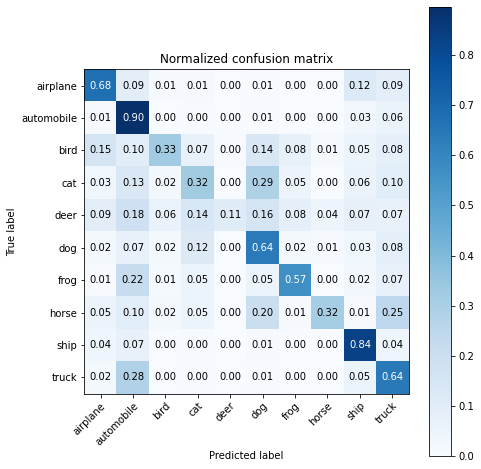

In [183]:

plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')


In [184]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Testing Accuracy Score = ', acc_score)

Testing Accuracy Score =  0.5327
